<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Package" data-toc-modified-id="Package-1">Package</a></span></li><li><span><a href="#Make-Stock-dataset" data-toc-modified-id="Make-Stock-dataset-2">Make Stock dataset</a></span><ul class="toc-item"><li><span><a href="#ETL-(only-once)" data-toc-modified-id="ETL-(only-once)-2.1">ETL (only once)</a></span></li><li><span><a href="#Read" data-toc-modified-id="Read-2.2">Read</a></span></li></ul></li><li><span><a href="#Produce-Article-data" data-toc-modified-id="Produce-Article-data-3">Produce Article data</a></span><ul class="toc-item"><li><span><a href="#ETL" data-toc-modified-id="ETL-3.1">ETL</a></span></li><li><span><a href="#Merge-Article-and-Stock" data-toc-modified-id="Merge-Article-and-Stock-3.2">Merge Article and Stock</a></span><ul class="toc-item"><li><span><a href="#正式融合文章和股價資料" data-toc-modified-id="正式融合文章和股價資料-3.2.1">正式融合文章和股價資料</a></span></li></ul></li></ul></li><li><span><a href="#3.-文章向量化處理" data-toc-modified-id="3.-文章向量化處理-4">3. 文章向量化處理</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#函數" data-toc-modified-id="函數-4.0.1">函數</a></span></li><li><span><a href="#正式把文章向量化處理" data-toc-modified-id="正式把文章向量化處理-4.0.2">正式把文章向量化處理</a></span></li></ul></li></ul></li><li><span><a href="#5.-建立預測模型" data-toc-modified-id="5.-建立預測模型-5">5. 建立預測模型</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-5.0.1">Gradient Boosting</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.0.2">Random Forest</a></span></li></ul></li></ul></li><li><span><a href="#6.-檢視模型結果" data-toc-modified-id="6.-檢視模型結果-6">6. 檢視模型結果</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#函數" data-toc-modified-id="函數-6.0.1">函數</a></span></li><li><span><a href="#先用-accuracy-衡量結果" data-toc-modified-id="先用-accuracy-衡量結果-6.0.2">先用 accuracy 衡量結果</a></span></li></ul></li></ul></li><li><span><a href="#7.-訓練演算法" data-toc-modified-id="7.-訓練演算法-7">7. 訓練演算法</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#函數" data-toc-modified-id="函數-7.0.1">函數</a></span></li><li><span><a href="#設定參數" data-toc-modified-id="設定參數-7.0.2">設定參數</a></span></li><li><span><a href="#下載股價資料" data-toc-modified-id="下載股價資料-7.0.3">下載股價資料</a></span></li><li><span><a href="#下載文字資料" data-toc-modified-id="下載文字資料-7.0.4">下載文字資料</a></span></li><li><span><a href="#讀取已下載的文字、股價資料" data-toc-modified-id="讀取已下載的文字、股價資料-7.0.5">讀取已下載的文字、股價資料</a></span></li><li><span><a href="#開始訓練" data-toc-modified-id="開始訓練-7.0.6">開始訓練</a></span></li></ul></li></ul></li><li><span><a href="#8.-一次跑全部" data-toc-modified-id="8.-一次跑全部-8">8. 一次跑全部</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#函數" data-toc-modified-id="函數-8.0.1">函數</a></span></li><li><span><a href="#下載資料" data-toc-modified-id="下載資料-8.0.2">下載資料</a></span></li><li><span><a href="#載入資料" data-toc-modified-id="載入資料-8.0.3">載入資料</a></span></li><li><span><a href="#正式跑" data-toc-modified-id="正式跑-8.0.4">正式跑</a></span></li></ul></li></ul></li><li><span><a href="#備份" data-toc-modified-id="備份-9">備份</a></span></li></ul></div>

# Package

In [5]:
#資料處理
import numpy as np                     #資料處理2陣列
import pandas as pd                    #資料處理1資料框
from math import nan
pd.set_option('max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

#畫圖
import matplotlib.pyplot as plt        #畫圖1
plt.style.use('seaborn-whitegrid')     #畫圖2設定seaborn的畫圖風格
import seaborn as sns                  #畫圖3漂亮畫圖套件
sns.set()                              #畫圖4設定seaborn

#時間
import datetime                        

#統計
import random                          #指定隨機狀態1
random.seed(123)                       #指定隨機狀態2

#其他
from tqdm import tqdm, trange          #用來掌管 for 進度
import os                              #用來控制路徑
import warnings                        #用來消除警告
warnings.filterwarnings("ignore")      #用來消除警告設定
from typing import Tuple               #vs code顯示type

#文字處理
import monpa                                                 
from monpa import utils
import re                                          

### 機器學習套件
from sklearn.feature_extraction.text import TfidfVectorizer  #把所有關鍵字變成文字向量模型的套件
from sklearn.feature_selection import SelectKBest            #用來挑出最好幾個的關鍵字的套件
from sklearn.feature_selection import chi2                   #SelectKBest 要輸入的 score function
from sklearn.metrics import accuracy_score                   #用來計算準確性
from sklearn.metrics import confusion_matrix                 #用來呈現結果
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

+---------------------------------------------------------------------+
  Welcome to MONPA: Multi-Objective NER POS Annotator for Chinese
+---------------------------------------------------------------------+
已找到 model檔。Found model file.


In [6]:
# Path
rawdata_path = '/Users/alexlo/Desktop/Programming/Project/Stock_ML/rawdata'
workdata_path = "/Users/alexlo/Desktop/Programming/Project/Stock_ML/workdata"

# ETL

## Stock dataset(ET)

產生聯電2303的資料集(only once)

In [ ]:
# Extract
os.chdir(rawdata_path)
stock_code = '2303'
sheets = ['上市2019', '上市2020', '上市2021']
stock_df = pd.DataFrame()

for i, sheets in enumerate(sheets):
    # get data & change type
    stock_data = pd.read_excel('stock_data_2019-2021.xlsx', sheet_name=sheets)
    stock_data = stock_data[stock_data['證券代碼'].str.startswith(stock_code)] \
        [['證券代碼', '年月日', '收盤價(元)']] \
        .astype({'年月日':'datetime64', '收盤價(元)':'float32'}) \
        .sort_values(by='年月日')
    
    # concat
    stock_df = pd.concat([stock_df, stock_data]).reset_index(drop = True)

False    517
True     214
Name: Label, dtype: int64


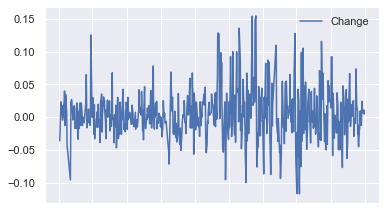

In [ ]:
# Parameter
day = 3            #每幾天算一次漲跌幅
cutoff = 0.02      #漲跌幅要超過多少%才算是漲

# Transform
stock_df = stock_df.rename(columns={'證券代碼':'Code', '年月日':'Date', '收盤價(元)':'Price'})
stock_df['Change'] = stock_df['Price'].rolling(window = day) \
                        .apply(lambda df: (df[day-1] - df[0]) / df[0], raw = True)
stock_df['Label'] = stock_df['Change'] > cutoff
stock_df = stock_df.astype({'Change':'float32'}) 

# Check up and down: 要有足夠的漲幅才值得預測
print(stock_df.Label.value_counts())
ax = stock_df.plot(kind='line', x='Date', y='Change')
ax.set(xlabel='', xticklabels='');

In [ ]:
# Save
os.chdir(workdata_path)
stock_df.to_parquet('聯電_d3_c2.parquet', index=False) 

## Stock dataset(L)

In [7]:
# Read
os.chdir(workdata_path)
stock_df = pd.read_parquet('聯電_d3_c2.parquet')
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
stock_df.head()

,Code,Date,Price,Change,Label
0,2303 聯電,2019-01-02,10.15,NaN,False
1,2303 聯電,2019-01-03,9.97,NaN,False
2,2303 聯電,2019-01-04,9.78,-0.04,False
3,2303 聯電,2019-01-07,10.06,0.01,False
4,2303 聯電,2019-01-08,10.01,0.02,True


## Article dataset(ETL)

In [8]:
# Parameter
os.chdir(rawdata_path)
keywords = ['群創'] #the keyword to filter the articles
keywords_times_titles = 1
keywords_times_content = 2

# Extract
text_data = pd.read_csv('bda2022_mid_bbs_2019-2021.csv')

# Transform
text_data = text_data.rename(columns={'post_time':'Post_Time', 'title':'Title', 'content':'Content'})
text_data['Post_Time'] = pd.to_datetime(text_data['Post_Time']).dt.date

# Filter the key words
criteria1 = (text_data['Title'].str.count('|'.join(keywords)) >= keywords_times_titles)
criteria2 = (text_data['Content'].str.count('|'.join(keywords)) >= keywords_times_content)
text_data = text_data[(criteria1) | (criteria2)].reset_index(drop = True)

## Final dataset
by merging Article and Stock

In [9]:
# Merge
stock_df['Two_Days'] = datetime.timedelta(days=2) 
stock_df['Date_L2'] = stock_df['Date'] - stock_df['Two_Days']
main_df = pd.merge(text_data, stock_df, left_on='Post_Time', right_on='Date_L2') \
            [['Post_Time', 'Title', 'Content', 'Label']]

# Drop NA     
stock_df = stock_df[stock_df['Label'].notnull()]
main_df = main_df[main_df['Label'].notnull()]

# Summary
main_df['Label'].value_counts()

False    317
True     165
Name: Label, dtype: int64

# Vetorization

## Function

In [10]:
# Remove the characters which are not Chinese
def remove_nonChinese(sentence):
    return re.sub(r'[^\u4e00-\u9fa5]+', '', sentence)

# Shorten the long words in a word list
def shorten_word(word_list: list) -> list:
    for word in word_list:
        if word.startswith(('一', '二','三','四','五','六','七','八','九','十')):
            word_list.remove(word)
            continue
        if len(word) >= 5:
            word_list.remove(word)
            word_list.append(word[:2])
            word_list.append(word[2:])
    return word_list
   
    
# Transfrom list of article into list of "split words"
def get_word_df(df: pd.DataFrame, start, end) -> list:
    # Goal: 一個 List 裡面的每一個成員都是一篇文章被用空格分割成一個個字
    article_into_words_list = []
    len_of_df = len(df[df['Post_Time'].between(start, end)])
    for index in trange(0, len_of_df): #幾篇文章就要跑幾次
        article_into_words = str()
        try:    
            article = df['Content'][index]
            sentence_list = utils.short_sentence(article) #先把一篇文章切成很多句
            for sentence in sentence_list: #再針對每一句切成很多個字
                sentence = remove_nonChinese(sentence)
                word_list = monpa.cut(sentence)
                if word_list is not None:
                    word_list = shorten_word(word_list)
                    article_into_words += ' '.join(word_list)
            article_into_words_list.append(article_into_words)
        except:
            article_into_words_list.append('')
    return article_into_words_list


# Get tfidf matrix
def get_tfidf_matrix(stop_words: list, word_df: list):
    vectorizer = TfidfVectorizer(stop_words=stop_words)                      
    tfidf_matrix = vectorizer.fit_transform(word_df)       
    tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names())
    return tfidf_matrix


### 獲得 X, y 矩陣
def get_X_y(df: pd.DataFrame, word_df: list, stop_words: list, start, end):
    # make X and y
    X = get_tfidf_matrix(stop_words, word_df)
    y = df[df['Post_Time'].between(start, end)]['Label'].reset_index(drop = True)
    
    # drop when y is NA
    X = X[y.notnull()].reset_index(drop = True)         
    y = y[y.notnull()].reset_index(drop = True)         
    return X, y


### 進一步縮小 X 矩陣內詞的數量，挑出更好的關鍵詞
def feature_better_X(X, y, k, method = chi2):
    selector = SelectKBest(method, k = k).fit(X, y)           
    k_features = X.columns[selector.get_support()]  
    X = X[k_features]
    return X, k_features

## Parameter & Preview

In [12]:
main_df


,Post_Time,Title,Content,Label
0,2019-01-02,[新聞] 中國再開新產能 2019年面板持續供過於求,1.原文連結： https://tinyurl.com/yat7yaog 2.原文內容...,False
1,2019-01-02,[新聞] 14檔高殖利率 外資回頭搶補,1.原文連結： https://goo.gl/K9mTJb 2.原文內容： https...,False
2,2019-01-07,[新聞] 陸面板大擴產 雙虎有壓,1.原文連結： https://tinyurl.com/ycpmhxxl 2.原文內容...,False
3,2019-01-08,[其他] 108/01/08 加權股價指數成分股暨市值比重,昨天有人問了個老問題@@ 這個資料要怎麼用 欸豆捏...阿就是算加權指數阿XDDD 不...,False
4,2019-01-12,[其他] 108/01/11 加權股價指數成分股暨市值比重,週五去實驗室弄電路板弄到心力交瘁= = 今天才補資料抱歉囉～ 祝大家周末愉快 以下資料...,False
...,...,...,...,...
477,2021-12-07,[新聞] 大摩：12月面板只跌1％ 看好友達、群創,原文標題：產業分析》大摩：12月面板只跌1％ 看好友達、群創 原文連結：https://ec...,False
478,2021-12-13,[新聞] 證交所：外資今年賣超台股4985億元,原文標題：證交所：外資今年賣超台股4985億元 原文連結：https://reurl.cc/...,False
479,2021-12-15,[標的] 群創3481 短多,1. 標的： 群創3481 2. 分類：多 3. 分析/正文： 技術面 所有5...,False
480,2021-12-22,[新聞] 搶賺紅包財 友達南亞科等4檔雙低股出列,原文標題： 搶賺紅包財 友達南亞科等4檔雙低股出列 原文連結： ...,False


In [13]:
# Choosing training and testing date
train_start = datetime.date(2019,1,1)
train_end = datetime.date(2021,6,30)
test_start = datetime.date(2021,7,1)
test_end = datetime.date(2021,12,31)

# Stop words for Chinese
os.chdir(rawdata_path)
with open('stopwords_zh.txt', 'r') as file:
    stop_words = file.read().splitlines() 

# The size of training and testing data
print(
    'There are', 
    len(main_df[main_df['Post_Time'].between(train_start, train_end)]),
    'artiles to train.'
)
print(
    'There are', 
    len(main_df[main_df['Post_Time'].between(test_start, test_end)]),
    'artiles to test.'
)

There are 359 artiles to train.
There are 123 artiles to test.


## Test mulitprocess

In [24]:
import multiprocessing as mp

def get_word_df(df: pd.DataFrame, row, start, end) -> list:
    # Goal: 一個 List 裡面的每一個成員都是一篇文章被用空格分割成一個個字
    df = df.iloc[1:200].copy()
    article_into_words_list = []
    print(len(df))
    len_of_df = len(df[df['Post_Time'].between(start, end)])
    print(len_of_df)
    for index in trange(0, len_of_df): #幾篇文章就要跑幾次
        article_into_words = str()
        print(index)
        try:    
            print('z')
            article = df['Content'][index]
            sentence_list = utils.short_sentence(article) #先把一篇文章切成很多句
            for sentence in sentence_list: #再針對每一句切成很多個字
                sentence = remove_nonChinese(sentence)
                word_list = monpa.cut(sentence)
                if word_list is not None:
                    word_list = shorten_word(word_list)
                    article_into_words += ' '.join(word_list)
            article_into_words_list.append(article_into_words)
        except:
            article_into_words_list.append('')
    return article_into_words_list

# Remove the characters which are not Chinese
def remove_nonChinese(sentence):
    return re.sub(r'[^\u4e00-\u9fa5]+', '', sentence)

# Shorten the long words in a word list
def shorten_word(word_list: list) -> list:
    for word in word_list:
        if word.startswith(('一', '二','三','四','五','六','七','八','九','十')):
            word_list.remove(word)
            continue
        if len(word) >= 5:
            word_list.remove(word)
            word_list.append(word[:2])
            word_list.append(word[2:])
    return word_list



# df_length = main_df.shape[0]
# df_cut = df_length / 10
# np.arange(0,df_length+1,df_cut)
%time
p1 = mp.Process(target=get_word_df, args=(main_df, [100,200], train_start, train_end))
p1.start()
# p1.join()


# df = main_df
# row = [1,200]
# df = df.iloc[row[0]:row[1]]
# df

# tdf_cutrain_word_df_list = get_word_df(main_df, train_start, train_end) #要跑超久要小心


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


199
46


  0%|          | 0/46 [00:00<?, ?it/s]

0
z
1
z


## Get matrix X, y for ML

It may takes a long and long time...

In [15]:
### 得到原始的 x, y training data
train_word_df_list = get_word_df(main_df, train_start, train_end) #要跑超久要小心
X_train, y_train = get_X_y(main_df, train_word_df_list, stop_words, train_start, train_end)
X_train, k_features = feature_better_X(X_train, y_train, k= 2000, method = chi2) 


### 得到原始的 x, y testing data
test_word_df_list = get_word_df(main_df, test_start, test_end)  #要跑超久要小心
X_test, y_test = get_X_y(main_df, test_word_df_list, stop_words, test_start, test_end)
X_test = X_test.reindex(k_features, axis=1, fill_value=0)           # 只挑出 train 的時候找出的 k_features

100%|██████████| 123/123 [00:47<00:00,  2.56it/s]


## Summary

In [16]:
print('Frequency distribution of training y: \n', y_train.value_counts().to_frame())
print('Frequency distribution of testing y: \n', y_test.value_counts().to_frame())
print(f'There are {len(X_test.columns[(X_test == 0).all()])} words that are not being used.')

Frequency distribution of training y: 
        Label
False    253
True     106
Frequency distribution of testing y: 
        Label
False     64
True      59
There are 963 words that are not being used.


# Run ML training

### Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
GBclf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=7, random_state=0)
GBclf.fit(X_train, y_train)
GBclf.score(X_train, y_train)

1.0

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(max_depth=2, random_state=0)
RFclf.fit(X_train, y_train)
RFclf.score(X_train, y_train)

0.7103064066852368

# Run ML testing

## Function

In [21]:
# Determine each day belongs to up or down
def get_prediction(trained_model, df, start, end, X_test):
    # Count the Prediction Label for each day
    test_data = df[df['Post_Time'].between(start, end)]
    test_data = test_data[test_data['Label'].notna()].reset_index(drop = True)
    test_data['Predict_Label'] = trained_model.predict(X_test)
    test_data['Counts'] = 1

    # Only leave the "Winning" Label for each day 
    prediction = test_data[['Post_Time', 'Predict_Label', 'Counts']] \
        .groupby(['Post_Time', 'Predict_Label']).count() \
        .sort_values('Counts', ascending = False) \
        .sort_index(level=[0], sort_remaining=False) \
        .groupby(level=0).head(1).reset_index()
    return prediction

# Determine each article belongs to up or down (i.e. weighted by # of articles each day)
def get_prediction_weighted(prediction, stock_df, start, end):
    # Predict up & down for each article according to the prediction label
    stock_df = stock_df[stock_df['Date_L2'].between(start, end)].reset_index(drop = True)  
    stock_df = pd.merge(stock_df, prediction, left_on='Date_L2', right_on='Post_Time')

    # Compute the Confusion matrix
    actual_label = stock_df['Label'] #testing data
    predict_label = stock_df['Predict_Label']
    return actual_label, predict_label 

# Prettify the confusion matrix
def pretty_confusion(confusion):
    x = pd.DataFrame(columns= ['真實漲', '真實跌'], index=['預測漲', '預測跌'])
    x['真實漲'] = confusion[0]
    x['真實跌'] = confusion[1]
    return x

## Measure
accuracy score = 預測正確(漲+跌) / 全部數量

In [22]:
# Parameter
MLmodel = GBclf

# Compute the score
prediction = get_prediction(MLmodel, main_df, test_start, test_end, X_test)
actual_label, predict_label = get_prediction_weighted(prediction, stock_df, test_start, test_end)
score = accuracy_score(actual_label, predict_label)
confusion = confusion_matrix(actual_label, predict_label)
confusion = pretty_confusion(confusion)
print(f"The accuracy score is {score}")
confusion 

The accuracy score is 0.5084745762711864


,真實漲,真實跌
預測漲,23,17
預測跌,12,7
